# EXPLORATORY ANALYSIS OF THE 21ST CENTURY

## Contents

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

### Connect to database

In [37]:
conn = sqlite3.connect('./sa_cricket.db')
cursor = conn.cursor()

<br><hr><br>

## Preprocessing

In [140]:
query = '''select
            strftime("%Y", m.match_date) as Year, 
            strftime("%m", m.match_date) as Month,
            m.match_date as Date,
            o.opp_name as Opposition,
            g.ground_name as Ground,
            g.country as Host,
            m.result as Result,
            m.toss as Toss
            from mat as m join
            opposition as o join
            ground as g
            where m.opposition=o.opp_id and m.ground=g.ground_id;
        '''
df = pd.read_sql_query(query, conn)
df.head()

,Year,Month,Date,Opposition,Ground,Host,Result,Toss
0,2000,03,2000-03-09,India,Nehru Stadium,India,India led the 5-match series 1-0,"South Africa , elected to bat first"
1,2000,03,2000-03-12,India,Keenan Stadium,India,India led the 5-match series 2-0,"South Africa , elected to bat first"
2,2000,03,2000-03-15,India,Nahar Singh Stadium,India,India led the 5-match series 2-1,"South Africa , elected to field first"
3,2000,03,2000-03-17,India,Reliance Stadium,India,India led the 5-match series 3-1,"South Africa , elected to bat first"
4,2000,03,2000-03-19,India,Vidarbha Cricket Association Ground,India,India won the 5-match series 3-2,"India , elected to field first"


In [143]:
def winner(result):
    if result == '':
        # This are non-tour games such as world cup and series
        winner = 'No result'
    else:
        if 'led' in result:
            winner = result.split(' led ')[0]
        elif 'won' in result:
            winner = result.split(' won ')[0]
        elif 'advanced' in result:
            winner = result.split(' advanced')[0]
        # There would be a need to handle cases like:
        # 3-match series level 1-1
        # 3-match series drawn 1-1
        elif 'level' in result:
            winner = 'Unknown-level'
        elif 'drawn' in result:
            winner = 'Unknown-draw'
        else:
            winner = 'Unknown'
    return winner
    '''
    The options from above are:
        [Country]
        No result
        Unknown*
    '''    

In [157]:
def win_filter(result):
    '''
    To make things simpler so that outcome of winner is either:
        Us
        Opposition
        -
    '''
    w = winner(result)
    if ('Unknown' in w) or w=='No result':
        return '-'
    elif w=='South Africa':
        return w
    else:
        return 'Opposition'

In [158]:
def tosser(t):
    t_split = t.split(' , elected to ')
    tosser = t_split[0]
    return tosser

def tosser_filter(t):
    toss = tosser(t)
    if toss=='South Africa':
        return toss
    else:
        return 'Opposition'

def choice(t):
    t_split = t.split(' , elected to ')
    choice = t_split[1]
    return choice

In [159]:
df['Winner'] = df['Result'].apply(win_filter)
df['Tosser'] = df['Toss'].apply(tosser_filter)
df['Toss Choice'] = df['Toss'].apply(choice)
df.head()

,Year,Month,Date,Opposition,Ground,Host,Result,Toss,Winner,Tosser,Toss Choice
0,2000,03,2000-03-09,India,Nehru Stadium,India,India led the 5-match series 1-0,"South Africa , elected to bat first",Opposition,South Africa,bat first
1,2000,03,2000-03-12,India,Keenan Stadium,India,India led the 5-match series 2-0,"South Africa , elected to bat first",Opposition,South Africa,bat first
2,2000,03,2000-03-15,India,Nahar Singh Stadium,India,India led the 5-match series 2-1,"South Africa , elected to field first",Opposition,South Africa,field first
3,2000,03,2000-03-17,India,Reliance Stadium,India,India led the 5-match series 3-1,"South Africa , elected to bat first",Opposition,South Africa,bat first
4,2000,03,2000-03-19,India,Vidarbha Cricket Association Ground,India,India won the 5-match series 3-2,"India , elected to field first",Opposition,Opposition,field first


In [163]:
df.drop(['Result', 'Toss'], axis=1, inplace=True)
df.head()

,Year,Month,Date,Opposition,Ground,Host,Winner,Tosser,Toss Choice
0,2000,03,2000-03-09,India,Nehru Stadium,India,Opposition,South Africa,bat first
1,2000,03,2000-03-12,India,Keenan Stadium,India,Opposition,South Africa,bat first
2,2000,03,2000-03-15,India,Nahar Singh Stadium,India,Opposition,South Africa,field first
3,2000,03,2000-03-17,India,Reliance Stadium,India,Opposition,South Africa,bat first
4,2000,03,2000-03-19,India,Vidarbha Cricket Association Ground,India,Opposition,Opposition,field first


<br><hr><br><hr><br>

## Match analysis

#### Which periods of the year are most busy?

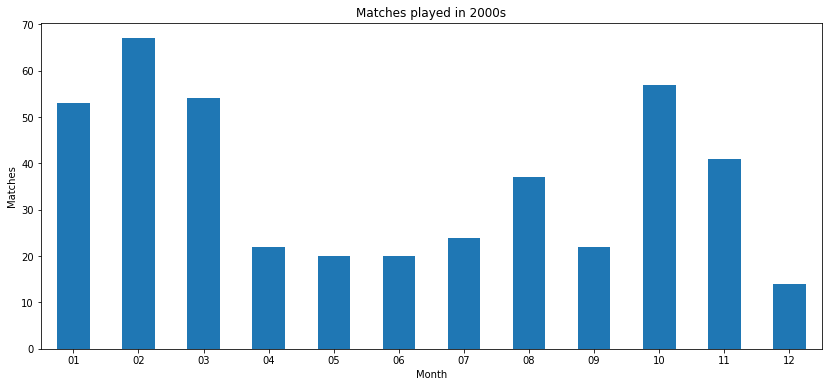

In [168]:
# Number of matches played each month since 2000
match_by_month = df.groupby(by='Month').count()['Winner']   #/20 to get the average
match_by_month.plot(kind='bar', figsize=(14,6))
plt.title('Matches played in 2000s')
plt.ylabel('Matches')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()

#### The first three months are most busy and followed immediately with the least busy months.
The last month is understandable (christmas and holiday period)

##### Which months do players perform best

In [194]:
# Number of matches played each month since 2000
match_by_month = df.groupby(by='Month', as_index=False)
match_by_month['Month']


### Tossing

In [131]:
def tosser(t):
    t_split = t.split(' , elected to ')
    tosser = t_split[0]
    return tosser

def choice(t):
    t_split = t.split(' , elected to ')
    choice = t_split[1]
    return choice

In [155]:
query = 'select toss from mat'
results = pd.read_sql_query(query, conn)
results.head()

,toss
0,"South Africa , elected to bat first"
1,"South Africa , elected to bat first"
2,"South Africa , elected to field first"
3,"South Africa , elected to bat first"
4,"India , elected to field first"


In [156]:
winners = results['toss'].apply(tosser)
#d = pd.DataFrame(winners)
#d.head()
winners.value_counts()

South Africa            228
Sri Lanka                31
Pakistan                 27
Australia                27
India                    25
Zimbabwe                 19
West Indies              19
England                  18
New Zealand              17
Bangladesh                9
Kenya                     4
Ireland                   3
Netherlands               2
United Arab Emirates      1
Canada                    1
Name: toss, dtype: int64

In [99]:
type(winners)

pandas.core.series.Series

### Most victorious years

In [36]:
def winner(result):
    if result == '':
        # This are non-tour games such as world cup and series
        winner = 'No result'
    else:
        if 'led' in result:
            winner = result.split(' led ')[0]
        elif 'won' in result:
            winner = result.split(' won ')[0]
        elif 'advanced' in result:
            winner = result.split(' advanced')[0]
        # There would be a need to handle cases like:
        # 3-match series level 1-1
        # 3-match series drawn 1-1
        elif 'level' in result:
            winner = 'Unknown-level'
        elif 'drawn' in result:
            winner = 'Unknown-draw'
        else:
            winner = 'Unknown'
    return winner
    '''
    The options are:
        South Africa
        [Opposition]
        No result
        Unknown*
    '''

In [147]:
query = 'select result from mat'
results = pd.read_sql_query(query, conn)
results.head()

,result
0,India led the 5-match series 1-0
1,India led the 5-match series 2-0
2,India led the 5-match series 2-1
3,India led the 5-match series 3-1
4,India won the 5-match series 3-2


In [149]:
winners = results['result'].apply(winner)
winners.value_counts()

South Africa     197
No result        109
Unknown-level     37
India             18
Australia         17
England           16
Sri Lanka         12
New Zealand        9
Pakistan           9
Unknown-draw       4
West Indies        2
Bangladesh         1
Name: result, dtype: int64

In [ ]:
cursor.close()
conn.close()